(array([2.63737538e-06, 2.37239575e-06, 1.83829618e-06, 1.36630122e-06,
        1.33317876e-06, 1.17998741e-06, 1.08890067e-06, 9.15007784e-07,
        7.36974595e-07, 7.24553675e-07, 6.66589381e-07, 6.95571528e-07,
        7.03852141e-07, 5.54801100e-07, 5.13398033e-07, 5.79642940e-07,
        5.05117419e-07, 3.64346991e-07, 3.85048524e-07, 3.27084230e-07,
        2.64979630e-07, 3.02242390e-07, 2.69119936e-07, 3.10523004e-07,
        2.52558710e-07, 2.44278096e-07, 2.27716869e-07, 2.07015336e-07,
        1.94594416e-07, 2.07015336e-07, 1.90454109e-07, 1.44910735e-07,
        9.52270544e-08, 1.03507668e-07, 8.28061343e-08, 9.52270544e-08,
        6.62449074e-08, 7.45255209e-08, 7.45255209e-08, 6.21046007e-08,
        4.96836806e-08, 4.55433739e-08, 6.62449074e-08, 5.79642940e-08,
        2.48418403e-08, 2.07015336e-08, 3.31224537e-08, 2.07015336e-08,
        3.31224537e-08, 5.38239873e-08, 6.62449074e-08, 3.31224537e-08,
        6.21046007e-08, 3.72627604e-08, 4.96836806e-08, 2.484184

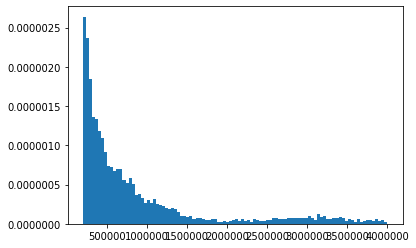

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as dates
%matplotlib inline 


fileLocation = 'avocado-prices.zip'
        
avpr = pd.read_csv(fileLocation, sep=',', usecols=range(1,14))

regions = {'Albany': 0, 'Atlanta': 1, 'BaltimoreWashington': 2, 'Boise': 3, 'Boston': 4,
       'BuffaloRochester': 5, 'California': 6, 'Charlotte': 7, 'Chicago': 8,
       'CincinnatiDayton': 9, 'Columbus': 10, 'DallasFtWorth': 11, 'Denver': 12,
       'Detroit': 13, 'GrandRapids': 14, 'GreatLakes':15, 'HarrisburgScranton':16,
       'HartfordSpringfield':17, 'Houston':18, 'Indianapolis':19, 'Jacksonville':20,
       'LasVegas':21, 'LosAngeles':22, 'Louisville':23, 'MiamiFtLauderdale':24,
       'Midsouth':25, 'Nashville': 26, 'NewOrleansMobile': 27, 'NewYork': 28,
       'Northeast': 29, 'NorthernNewEngland':30, 'Orlando':31, 'Philadelphia':32,
       'PhoenixTucson':33, 'Pittsburgh':34, 'Plains':35, 'Portland':36,
       'RaleighGreensboro':37, 'RichmondNorfolk':38, 'Roanoke':39, 'Sacramento':40,
       'SanDiego':41, 'SanFrancisco':42, 'Seattle':43, 'SouthCarolina':44,
       'SouthCentral':45, 'Southeast':46, 'Spokane':47, 'StLouis':48, 'Syracuse':49,
       'Tampa':50, 'TotalUS':51, 'West':52, 'WestTexNewMexico':53}

avpr['regionNum'] = [regions[item] for item in avpr['region']]
plt.hist(np.asarray(avpr.dropna()['Total Volume']), bins=100, range=[2e5,4e6], density=1)

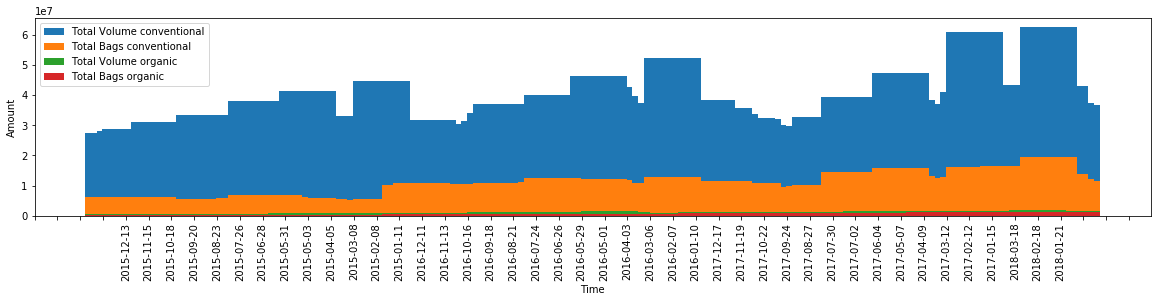

In [28]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);

plt.bar(avpr[avpr['type'] == 'conventional']['Date'], avpr[avpr['type'] == 'conventional']['Total Volume'], width=10, label='Total Volume conventional')
plt.bar(avpr[avpr['type'] == 'conventional']['Date'], avpr[avpr['type'] == 'conventional']['Total Bags'], width=10, label='Total Bags conventional')
plt.bar(avpr[avpr['type'] == 'organic']['Date'], avpr[avpr['type'] == 'organic']['Total Volume'], width=10, label='Total Volume organic')
plt.bar(avpr[avpr['type'] == 'organic']['Date'], avpr[avpr['type'] == 'organic']['Total Bags'], width=10, label='Total Bags organic')
plt.xlabel('Time')
start, end = plt.xlim()
plt.xticks(np.arange(start, end, 4),rotation=90)
plt.ylabel('Amount')
plt.legend()

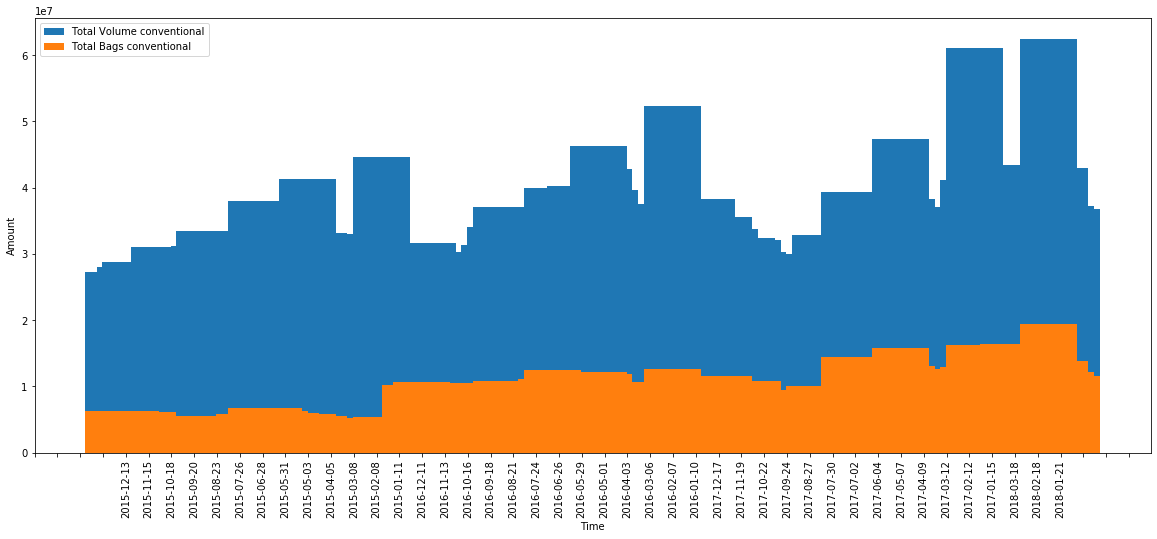

In [30]:
plt.figure(figsize=[20, 8]);
plt.bar(avpr[avpr['type'] == 'conventional']['Date'], avpr[avpr['type'] == 'conventional']['Total Volume'], width=10, label='Total Volume conventional')
plt.bar(avpr[avpr['type'] == 'conventional']['Date'], avpr[avpr['type'] == 'conventional']['Total Bags'], width=10, label='Total Bags conventional')
plt.xlabel('Time')
start, end = plt.xlim()
plt.xticks(np.arange(start, end, 4),rotation=90)

plt.ylabel('Amount')
plt.legend()

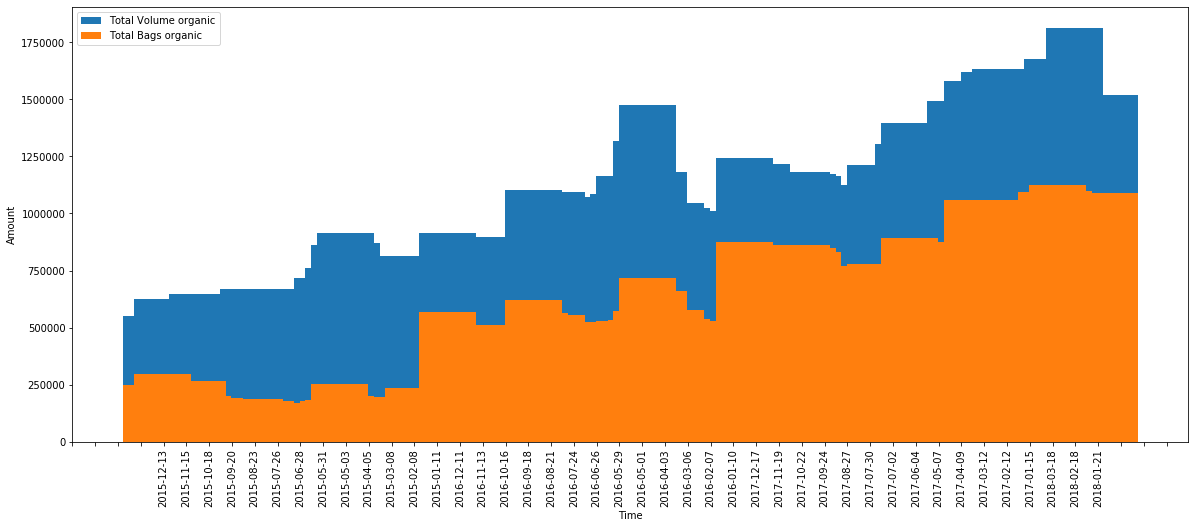

In [29]:
plt.figure(figsize=[20, 8]);
plt.bar(avpr[avpr['type'] == 'organic']['Date'], avpr[avpr['type'] == 'organic']['Total Volume'], width=10, label='Total Volume organic')
plt.bar(avpr[avpr['type'] == 'organic']['Date'], avpr[avpr['type'] == 'organic']['Total Bags'], width=10, label='Total Bags organic')
plt.xlabel('Time')
start, end = plt.xlim()
plt.xticks(np.arange(start, end, 4),rotation=90)

plt.ylabel('Amount')
plt.legend()

In [7]:
region_totalvolume = avpr.groupby(['region'])['Total Volume'].agg('sum')
region_totalvolume = region_totalvolume.drop(labels='TotalUS')
#Removed TotalUS to make it easier to read

<BarContainer object of 53 artists>

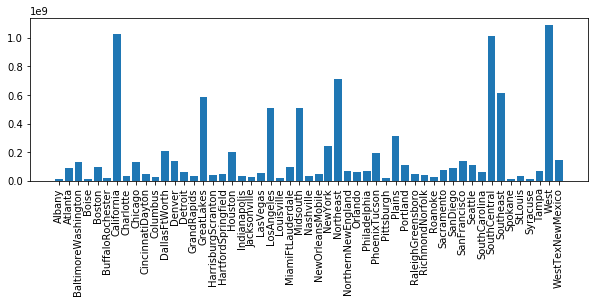

In [53]:
fig = plt.figure(figsize=(10, 3))

plt.xticks(rotation=90)
plt.bar(region_totalvolume.index, region_totalvolume)

<BarContainer object of 53 artists>

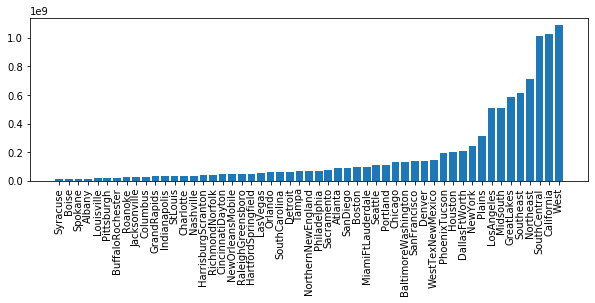

In [9]:
region_totalvolume_sorted = region_totalvolume.sort_values()
fig = plt.figure(figsize=(10, 3))

plt.xticks(rotation=90)
plt.bar(region_totalvolume_sorted.index, region_totalvolume_sorted)

In [54]:
volume_region_date = avpr.groupby(['Date','region'])['Total Volume'].sum()
avpr_totalUs = avpr[avpr['regionNum'] == 51].groupby(['Date'])['Total Volume'].sum()
#Greating a df of amount of volume/region/date for charts

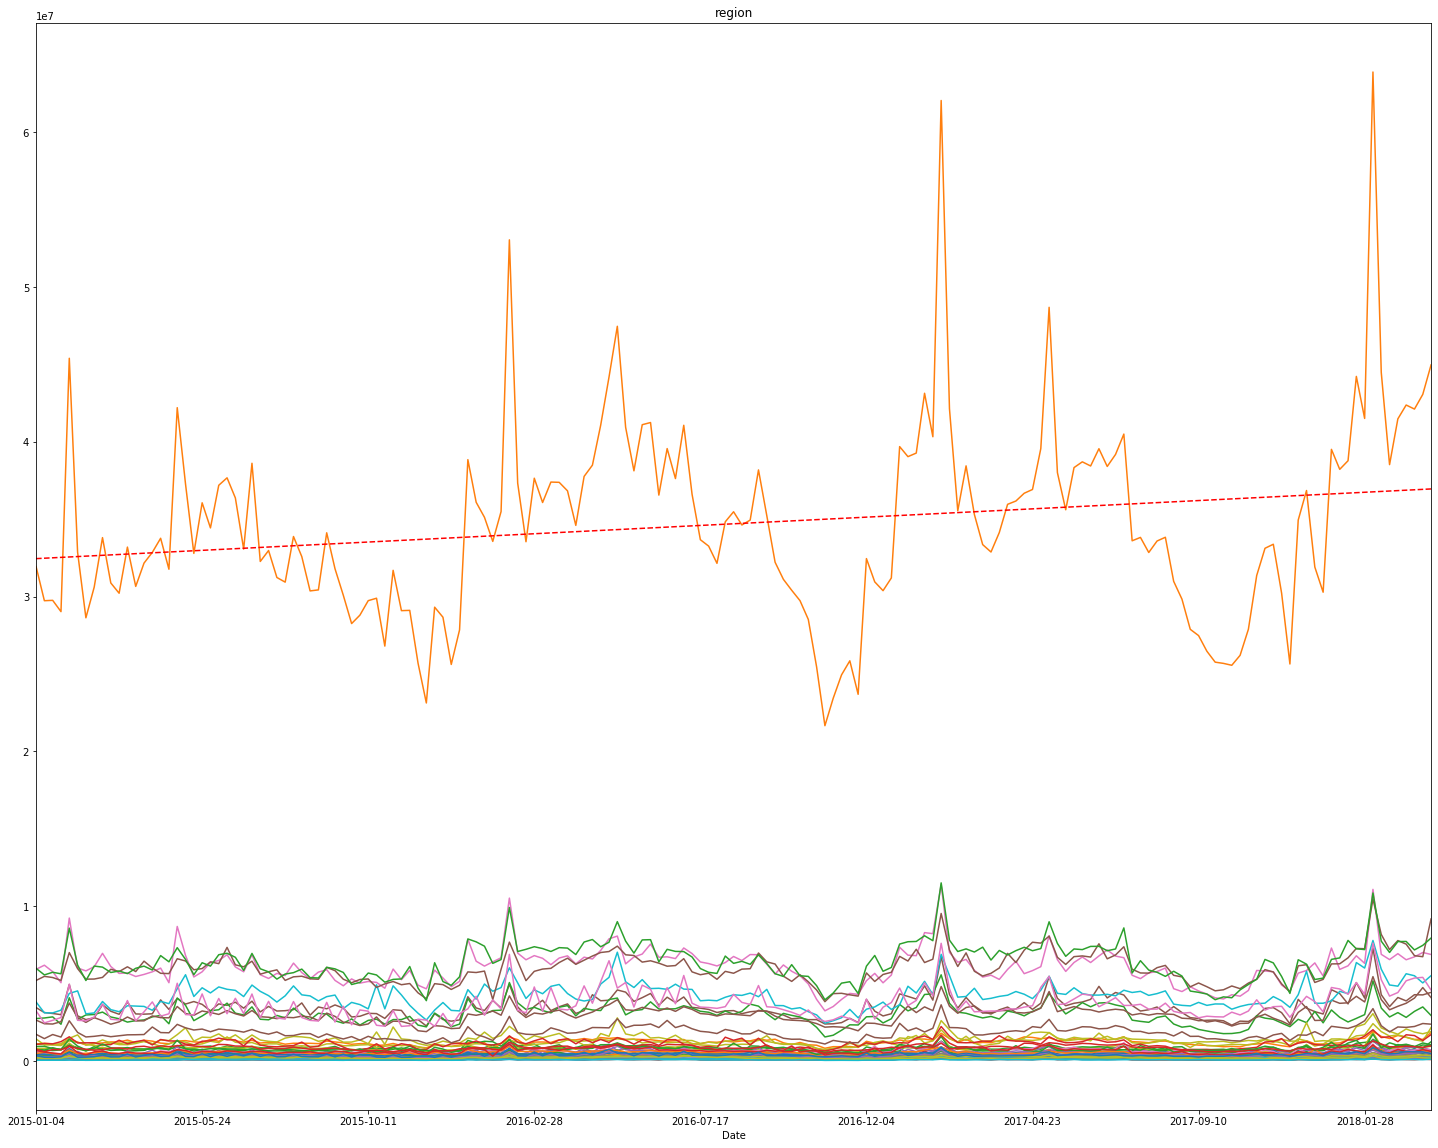

In [64]:
volume_region_date.unstack().plot(figsize=(25,20), title='region', legend=None)
z = np.polyfit(dates.datestr2num(avpr_totalUs.index), avpr_totalUs, 1)
p = np.poly1d(z)
plt.plot(p(dates.datestr2num(avpr_totalUs.index,)),"r--")